## **BITCOIN PRICE PREDICTION**
### This project deals with predicting the Bitcoin price in the future using LinearRegression

## loading dataset

In [1]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/WidhyaOrg/datasets/master/bitcoin_dataset.csv')
df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,btc_miners_revenue,btc_transaction_fees,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,0.000029,2.527738,0.0,0.0,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,0.000029,2.527738,0.0,0.0,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,0.000023,2.527738,0.0,0.0,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,0.000028,2.527738,0.0,0.0,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,0.000027,2.527738,0.0,0.0,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [2]:
df.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,btc_miners_revenue,btc_transaction_fees,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2906.000000,2.879000e+03,2.906000e+03,2.885000e+03,2877.000000,2906.000000,2906.000000,2906.000000,2894.000000,2.906000e+03,2.890000e+03,2.906000e+03,2896.000000,2906.000000,2906.000000,2.906000e+03,2906.000000,2.906000e+03,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03
mean,839.104218,1.151138e+07,1.344352e+10,7.398381e+07,35505.502848,0.350366,0.364074,671.673651,7.501113,1.244070e+06,1.606360e+11,2.184353e+06,60.434503,66.747821,14.639125,1.937861e+05,102081.138334,6.844558e+07,94348.852374,63140.320028,1.566216e+06,2.036475e+05,2.024338e+08
std,2304.972497,4.200024e+06,3.866841e+10,2.924228e+08,43618.633821,0.353168,0.842259,689.561322,4.974549,2.924141e+06,3.725159e+11,5.669939e+06,117.737162,1761.894646,20.536083,2.089146e+05,103896.929350,8.285341e+07,103966.111763,69687.052174,2.278910e+06,2.682781e+05,5.800513e+08
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,2.527738e+00,0.000000e+00,0.000000,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.653465,8.485300e+06,5.363081e+07,2.916456e+05,781.000000,0.024177,0.000000,54.000000,6.066667,1.160880e+01,1.591075e+06,4.659125e+04,9.472422,1.181945,4.156470,1.675475e+04,8025.250000,2.413376e+06,6813.500000,6765.500000,4.901712e+05,9.600325e+04,9.581680e+05
50%,235.130000,1.243115e+07,3.346869e+09,1.001414e+07,15183.000000,0.196022,0.000000,375.000000,7.916667,2.176189e+04,2.193848e+09,8.716363e+05,20.415194,2.493564,7.822430,1.304450e+05,62337.000000,3.255271e+07,53483.000000,35283.500000,1.105205e+06,1.784685e+05,3.742576e+07
75%,594.191164,1.520051e+07,8.075525e+09,2.834038e+07,58293.000000,0.676065,0.000000,1232.995223,10.208333,1.035363e+06,1.130000e+11,1.827683e+06,49.627982,5.915591,14.800589,3.603765e+05,190471.250000,1.080663e+08,185901.750000,113793.250000,2.031654e+06,2.588046e+05,1.312499e+08
max,19498.683330,1.683769e+07,3.270000e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,2.600000e+12,5.319158e+07,1495.946477,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


In [3]:
print(df.btc_market_price[1023])

13.6888


**since we need to predict the price of bitcoins, 'btc_market_price' is the desired output variable.**




# Exploratory data analysis

we can perform Exploratory Data Analysis(EDA) to decide which features correlate with our desired output variable. It will help us to decide which features to take up and which to discard

Pandas **dataframe.corr()** is used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.**The correlation of a variable with itself is 1.**

In [4]:
df.corr(method='pearson').head()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,btc_miners_revenue,btc_transaction_fees,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
btc_market_price,1.000000,0.392474,0.999783,0.868813,0.674507,0.544033,-0.076400,0.544125,0.275250,0.920876,0.916937,0.986732,0.806595,-0.013517,0.815507,0.663917,0.569603,0.680048,0.558416,0.567281,0.111734,0.050894,0.968308
btc_total_bitcoins,0.392474,1.000000,0.384568,0.285815,0.779705,0.851554,0.274925,0.831414,0.668119,0.488668,0.497603,0.383108,0.472122,-0.079864,0.372758,0.820595,0.832865,0.782652,0.814721,0.800405,0.290952,0.211814,0.387920
btc_market_cap,0.999783,0.384568,1.000000,0.869316,0.672863,0.541310,-0.080742,0.541702,0.271929,0.922073,0.918065,0.985417,0.807109,-0.012923,0.805645,0.660720,0.566857,0.678081,0.555674,0.564791,0.112410,0.051356,0.968533
btc_trade_volume,0.868813,0.285815,0.869316,1.000000,0.521061,0.416060,-0.068798,0.430265,0.216617,0.758304,0.754650,0.875005,0.733812,-0.009456,0.691630,0.539430,0.453644,0.525484,0.441964,0.449660,0.097722,0.056079,0.896016
btc_blocks_size,0.674507,0.779705,0.672863,0.521061,1.000000,0.955978,0.050864,0.946702,0.511763,0.826119,0.841630,0.622620,0.745205,-0.030112,0.443102,0.966650,0.950189,0.999785,0.951959,0.961206,0.251049,0.152055,0.672394


here **btc_market_cap** feature shows perfect correlation with btc_market_price since correlation coefficient is close to 1 in this case

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

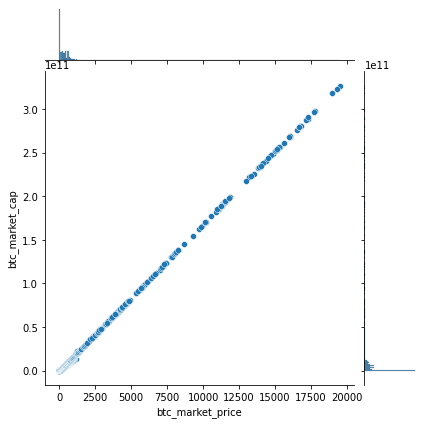

In [6]:
sns.jointplot(data=df,x="btc_market_price",y="btc_market_cap")

## Cleaning data

In [7]:
df.isnull().sum() #checking for NaN values

Date                                                    0
btc_market_price                                        0
btc_total_bitcoins                                     27
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                        29
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                           12
btc_hash_rate                                           0
btc_difficulty                                         16
btc_miners_revenue                                      0
btc_transaction_fees                                   10
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_addresses                                  0
btc_n_transact

In [8]:
df=df.fillna(0) #replacing null values with 0

## choosing features

In [9]:
price_features=['btc_market_cap','btc_n_transactions','btc_miners_revenue','btc_cost_per_transaction','btc_difficulty','btc_hash_rate','btc_cost_per_transaction_percent']
X=df[price_features]

In [10]:
y=df['btc_market_price']

## splitting dataset

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


## Defining model

In [12]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting

In [13]:
y_pred=model.predict(X_test)

## Evaluating performance

In [14]:
from sklearn import metrics
print("Mean squared Error:",metrics.mean_squared_error(y_test,y_pred))

Mean squared Error: 438.7949676062714
